In [ ]:
import numpy as np
import scipy.io
import pandas as pd
import random
from sklearn import datasets, linear_model
from sklearn.metrics import explained_variance_score
random.seed(20)

In [ ]:
m = 100
dimensions = list(range(2, 51))
res = []
for d in dimensions:
  mean = np.array([i for i in range(d)])
  cov = np.ones((d, d))
  X = np.random.multivariate_normal(mean, cov, 2*m)
  Y = []
  # w = np.array([i + random.randint(0, 10) for i in range(d)])
  w = 0.8*np.ones((d))
  for i in range(2*m):
    y = np.random.normal(np.dot(X[i], w), 1)
    Y.append(y)
  Y = np.array(Y)
  id_list = list(range(len(X)))
  random.shuffle(id_list)
  id_train = id_list[0:100]
  id_test = id_list[100:]
  X_train = X[id_train]
  Y_train = Y[id_train]
  X_test = X[id_test]
  Y_test = Y[id_test]

  linear_reg = linear_model.LinearRegression()
  linear_reg.fit(X_train, Y_train)
  Y_pred = linear_reg.predict(X_test)
  exp_var = explained_variance_score(Y_test, Y_pred)
  res.append(exp_var)

In [ ]:
import matplotlib.pyplot as plt

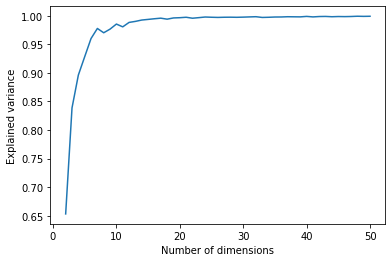

In [ ]:
plt.plot(dimensions, res)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained variance")
plt.show()